In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import utils as u

root_img_fold = "/home/doga/PycharmProjects/objectLocalization/dataset/wounds"

In [3]:
image_names = ['2021-09-01_photo1.jpg','2021-09-01_photo2_rl.jpg','2021-09-01_photo3_rr.jpg']
a_image_full_path = os.path.join(root_img_fold, image_names[0])
print(a_image_full_path)

/home/doga/PycharmProjects/objectLocalization/dataset/wounds/2021-09-01_photo1.jpg


w(3024), h(4032)


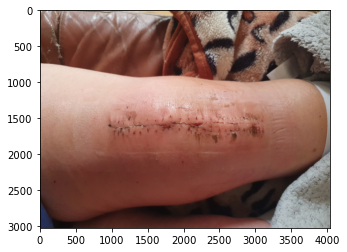

In [4]:
img = mpimg.imread(a_image_full_path)
print("w({:}), h({:})".format(img.shape[0],img.shape[1]))
imgplot = plt.imshow(img, origin="upper")

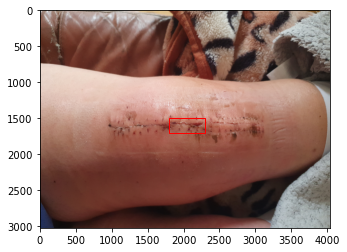

Rectangle(xy=(1800, 1500), width=500, height=200, angle=0)


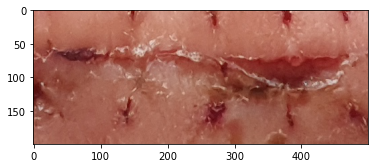

In [5]:
block_corner = {"col_w":1800,"row_h":1500}
block_wh = {"w":500,"h":200}
r = u.get_rectangle((block_corner["col_w"],block_corner["row_h"]), block_wh)
u.draw_box(img,r)
print(r)
img_box = u.crop_rect_from_img(img,r)
plt.imshow(img_box, origin="upper")

<Figure size 432x288 with 0 Axes>

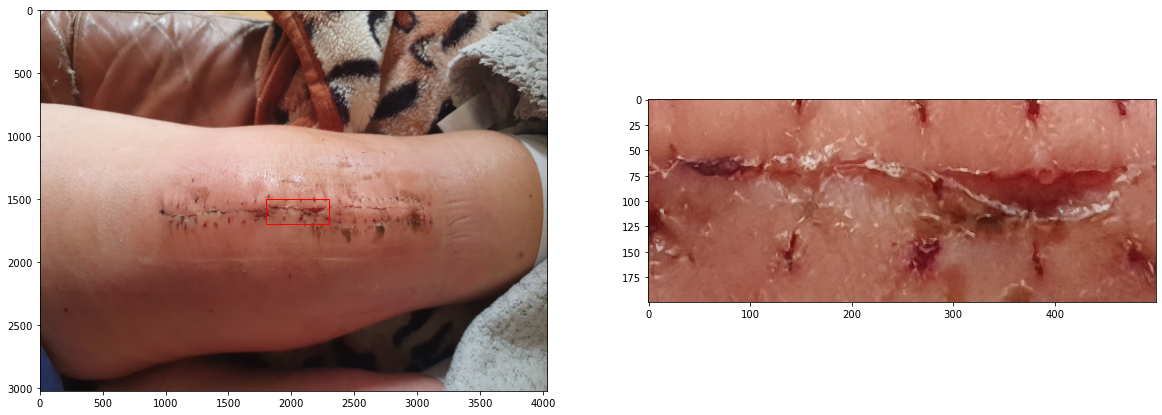

In [6]:
r = u.get_rectangle((block_corner["col_w"],block_corner["row_h"]), block_wh)
img_box = u.crop_and_show(img,r)

In [7]:
print(type(img))
rot_img = u.rotate_img(img, 5)
print(type(rot_img))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


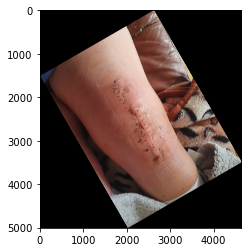

In [8]:
plt.imshow(rot_img, cmap=plt.cm.gray)

In [9]:
rm = u.create_rot_matrix(45)
print(np.shape(rm))
print(rm)

#suppose I have a set of points
pt_list = [[1.0,0.0],[0.7,0.7],[0.0,1.0],[-0.7,-0.7]]
pt_list = u.convert_points_3col(pt_list)
print(np.shape(pt_list))
print(pt_list)

deg(45) = rad(0.7853981633974483)
(3, 3)
[[0.7071067811865476, -0.7071067811865475, 0], [0.7071067811865475, 0.7071067811865476, 0], [0, 0, 1]]
(4, 3)
[[ 1.   0.   1. ]
 [ 0.7  0.7  1. ]
 [ 0.   1.   1. ]
 [-0.7 -0.7  1. ]]


In [10]:
print(u.mat_mul(pt_list, rm))

[[ 7.07106781e-01 -7.07106781e-01  1.00000000e+00]
 [ 9.89949494e-01  1.11022302e-16  1.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01  1.00000000e+00]
 [-9.89949494e-01 -1.11022302e-16  1.00000000e+00]]


In [11]:
idx = u.get_indices_of_image(w=3, h=5)
#print(np.shape(idx))
#print(idx)

In [12]:
pixel_pts = u.convert_points_3col(idx)
print(pixel_pts)

[[0. 0. 1.]
 [0. 1. 1.]
 [0. 2. 1.]
 [1. 0. 1.]
 [1. 1. 1.]
 [1. 2. 1.]
 [2. 0. 1.]
 [2. 1. 1.]
 [2. 2. 1.]
 [3. 0. 1.]
 [3. 1. 1.]
 [3. 2. 1.]
 [4. 0. 1.]
 [4. 1. 1.]
 [4. 2. 1.]]


In [13]:
idx, center_add = u.get_pixels_of_image_given_center(w=3, h=5, c=[2,2])
print("center_add = ", center_add)
print(idx)

center_add =  [2, 2, 0]
[[-2. -2.  1.]
 [-2. -1.  1.]
 [-2.  0.  1.]
 [-1. -2.  1.]
 [-1. -1.  1.]
 [-1.  0.  1.]
 [ 0. -2.  1.]
 [ 0. -1.  1.]
 [ 0.  0.  1.]
 [ 1. -2.  1.]
 [ 1. -1.  1.]
 [ 1.  0.  1.]
 [ 2. -2.  1.]
 [ 2. -1.  1.]
 [ 2.  0.  1.]]


In [14]:
rot_pixels = u.rotate_pixels(idx, rm)
print(rot_pixels)

[[-2.82842712e+00 -2.22044605e-16  1.00000000e+00]
 [-2.12132034e+00  7.07106781e-01  1.00000000e+00]
 [-1.41421356e+00  1.41421356e+00  1.00000000e+00]
 [-2.12132034e+00 -7.07106781e-01  1.00000000e+00]
 [-1.41421356e+00 -1.11022302e-16  1.00000000e+00]
 [-7.07106781e-01  7.07106781e-01  1.00000000e+00]
 [-1.41421356e+00 -1.41421356e+00  1.00000000e+00]
 [-7.07106781e-01 -7.07106781e-01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-7.07106781e-01 -2.12132034e+00  1.00000000e+00]
 [ 1.11022302e-16 -1.41421356e+00  1.00000000e+00]
 [ 7.07106781e-01 -7.07106781e-01  1.00000000e+00]
 [ 2.22044605e-16 -2.82842712e+00  1.00000000e+00]
 [ 7.07106781e-01 -2.12132034e+00  1.00000000e+00]
 [ 1.41421356e+00 -1.41421356e+00  1.00000000e+00]]


In [15]:
rot_deg = 45
im_w=3 
im_h=5 
rot_c=[2,2]
rot_pix_vals, pix_vals_original, center_add = u.get_rotated_pixel_vals(im_w, im_h, rot_c, rot_deg)
print("center_add = ", center_add)
print("pix_vals_original")
print(pix_vals_original+center_add)
print("rot_pix_vals")
print(rot_pix_vals+center_add)

deg(45) = rad(0.7853981633974483)
center_add =  [2, 2, 0]
pix_vals_original
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 2. 1.]
 [1. 0. 1.]
 [1. 1. 1.]
 [1. 2. 1.]
 [2. 0. 1.]
 [2. 1. 1.]
 [2. 2. 1.]
 [3. 0. 1.]
 [3. 1. 1.]
 [3. 2. 1.]
 [4. 0. 1.]
 [4. 1. 1.]
 [4. 2. 1.]]
rot_pix_vals
[[-0.82842712  2.          1.        ]
 [-0.12132034  2.70710678  1.        ]
 [ 0.58578644  3.41421356  1.        ]
 [-0.12132034  1.29289322  1.        ]
 [ 0.58578644  2.          1.        ]
 [ 1.29289322  2.70710678  1.        ]
 [ 0.58578644  0.58578644  1.        ]
 [ 1.29289322  1.29289322  1.        ]
 [ 2.          2.          1.        ]
 [ 1.29289322 -0.12132034  1.        ]
 [ 2.          0.58578644  1.        ]
 [ 2.70710678  1.29289322  1.        ]
 [ 2.         -0.82842712  1.        ]
 [ 2.70710678 -0.12132034  1.        ]
 [ 3.41421356  0.58578644  1.        ]]


In [16]:
print(rm)
print(np.shape(rm))

[[0.7071067811865476, -0.7071067811865475, 0], [0.7071067811865475, 0.7071067811865476, 0], [0, 0, 1]]
(3, 3)


In [17]:
print(u.mat_mul(rm,np.array(rm).T.tolist()))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


(62, 62)
Rectangle(xy=(28, 21), width=10, height=10, angle=0)


<Figure size 432x288 with 0 Axes>

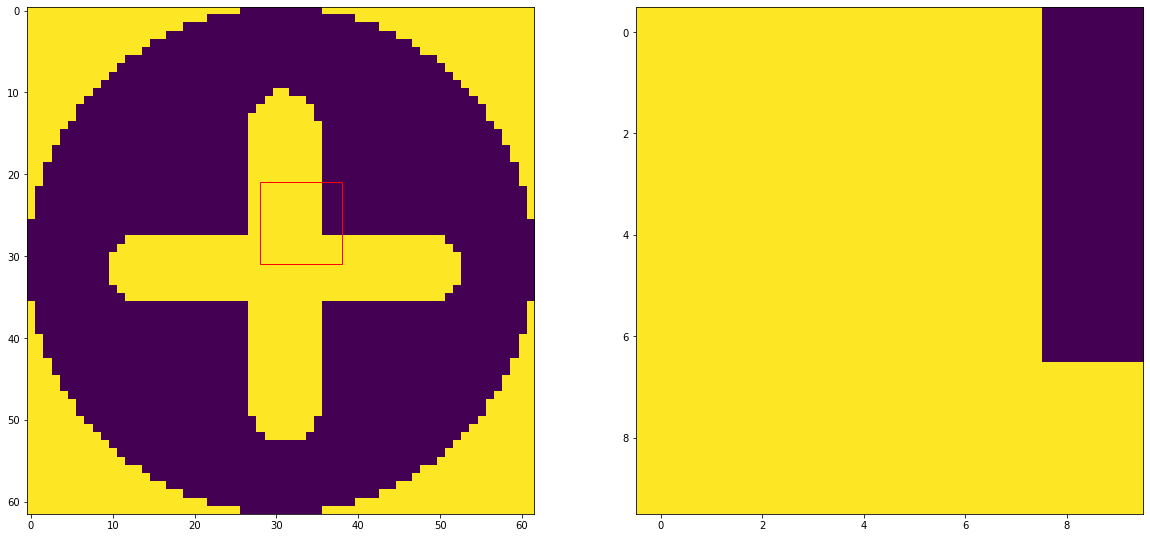

In [18]:
im_full_path = os.path.join(root_img_fold, "symbol_plus_mini.jpg")
block_corner = {"col_w":28,"row_h":21}
block_wh = {"w":10,"h":10}
img = mpimg.imread(im_full_path)
img = u.make_uint8_bw(img)
print(np.shape(img))
r = u.get_rectangle((block_corner["col_w"],block_corner["row_h"]), block_wh)
print(r)
img_box= u.crop_and_show(img,r)

In [19]:
u.search_iminim(img, img_box)

will convolve im((62, 62)) with cf((10, 10))
perc(1.0)
will find in res_find((53, 53))


(<matplotlib.patches.Rectangle at 0x7fb2ebd9c7d0>,
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255,   0,   0],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8))

In [20]:
import torch.nn as nn
kern_sz = np.shape(img_box)
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=kern_sz, stride=1, padding=0)

In [21]:
print(conv.weight.shape)
print(img_box.shape)
print(conv.weight[0,0,:,:])
print(img_box)
conv.weight[0,0,:,:] = torch.from_numpy(img_box)
conv.weight[1,0,:,:] = torch.from_numpy(1-img_box)
print(conv.weight)

torch.Size([2, 1, 10, 10])
(10, 10)
tensor([[ 0.0776,  0.0705,  0.0556, -0.0309,  0.0138, -0.0770,  0.0320,  0.0065,
         -0.0341,  0.0913],
        [ 0.0299,  0.0070,  0.0773, -0.0079, -0.0388,  0.0194,  0.0815,  0.0424,
         -0.0699, -0.0570],
        [ 0.0136,  0.0171,  0.0692, -0.0164,  0.0795,  0.0490,  0.0756, -0.0754,
         -0.0932,  0.0751],
        [-0.0868, -0.0323, -0.0440,  0.0368, -0.0184,  0.0875, -0.0047, -0.0956,
         -0.0806,  0.0049],
        [ 0.0773,  0.0958, -0.0306, -0.0186, -0.0428,  0.0731, -0.0842,  0.0490,
         -0.0599,  0.0426],
        [ 0.0707,  0.0204,  0.0346,  0.0715,  0.0872, -0.0543, -0.0287, -0.0367,
          0.0217,  0.0907],
        [ 0.0181,  0.0815,  0.0342, -0.0886, -0.0954,  0.0615, -0.0117,  0.0560,
          0.0564,  0.0187],
        [ 0.0059,  0.0697,  0.0322, -0.0170, -0.0234,  0.0490,  0.0175, -0.0780,
         -0.0986, -0.0547],
        [ 0.0478, -0.0165, -0.0439, -0.0473,  0.0077,  0.0878,  0.0480,  0.0042,
          0

In [22]:
print(type(img[0,0]))
img_1 = torch.from_numpy(np.asarray(img,dtype=np.float32))
img_2 = torch.from_numpy(np.asarray(1-img,dtype=np.float32))
print(type(img[0,0]))

<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [23]:
y1 = conv(img_1.view(1, 1, img_1.shape[0], img_1.shape[1]))
y2 = conv(img_2.view(1, 1, img_2.shape[0], img_2.shape[1]))

In [24]:
res_img_1 = y1.detach().numpy().squeeze()
res_img_2 = y2.detach().numpy().squeeze()
print(res_img_1.shape)
print(max(res_img_1.ravel()))
print(res_img_2.shape)
print(max(res_img_2.ravel()))
res_find = res_img_1[0,:,:]+res_img_2[1,:,:]
print(res_find.shape)
print(max(res_find.ravel()))

(2, 53, 53)
85.98416
(2, 53, 53)
85.98416
(53, 53)
99.9644


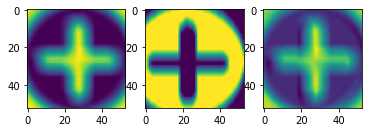

In [25]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(res_img_1[0,:,:])
ax[1].imshow(res_img_2[1,:,:])
ax[2].imshow(res_find)

In [26]:
idx = np.unravel_index(res_find.argmax(), res_find.shape)
print(idx, np.argmax(res_find>99.0))

(21, 28) 1141


In [27]:
r2 = u.search_iminim(img, img_box)
img_box_2 = u.crop_and_show(img,r2)

will convolve im((62, 62)) with cf((10, 10))
perc(1.0)
will find in res_find((53, 53))


AttributeError: 'tuple' object has no attribute 'xy'

Rectangle(xy=(12, 23), width=20, height=10, angle=0)


<Figure size 432x288 with 0 Axes>

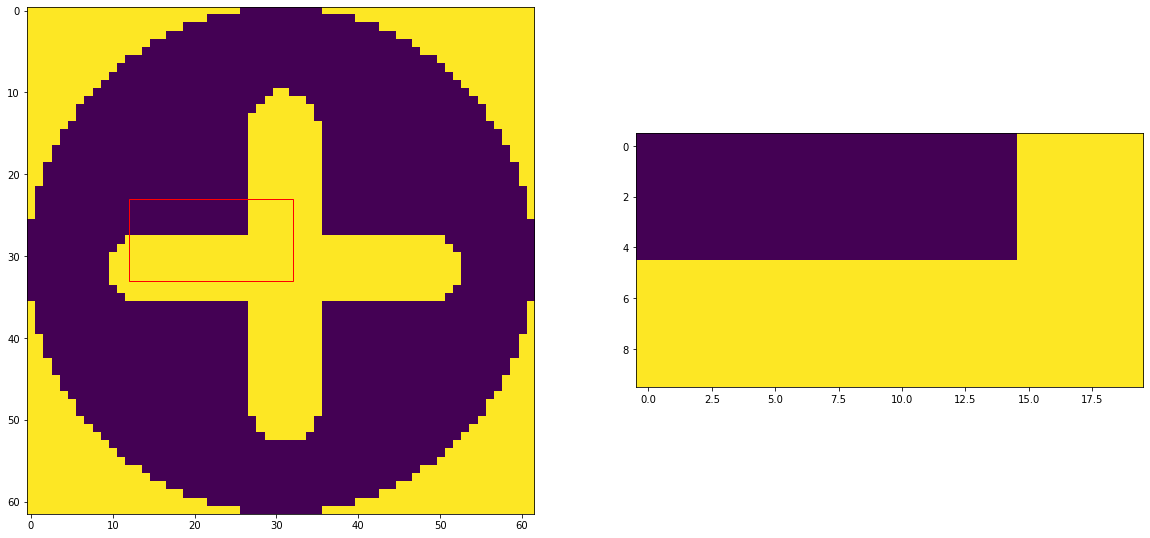

(10, 20)
will convolve im((62, 62)) with cf((10, 20))
perc(1.0)
will find in res_find((53, 43))
expected max value is 200
 faulty max can be 50.0
 max val is 199.95364379882812
rect approximately at xcw(12.0), yrh(23.0)
Rectangle(xy=(12, 23), width=20, height=10, angle=0)
imgN.shape=  (62, 62)


<Figure size 432x288 with 0 Axes>

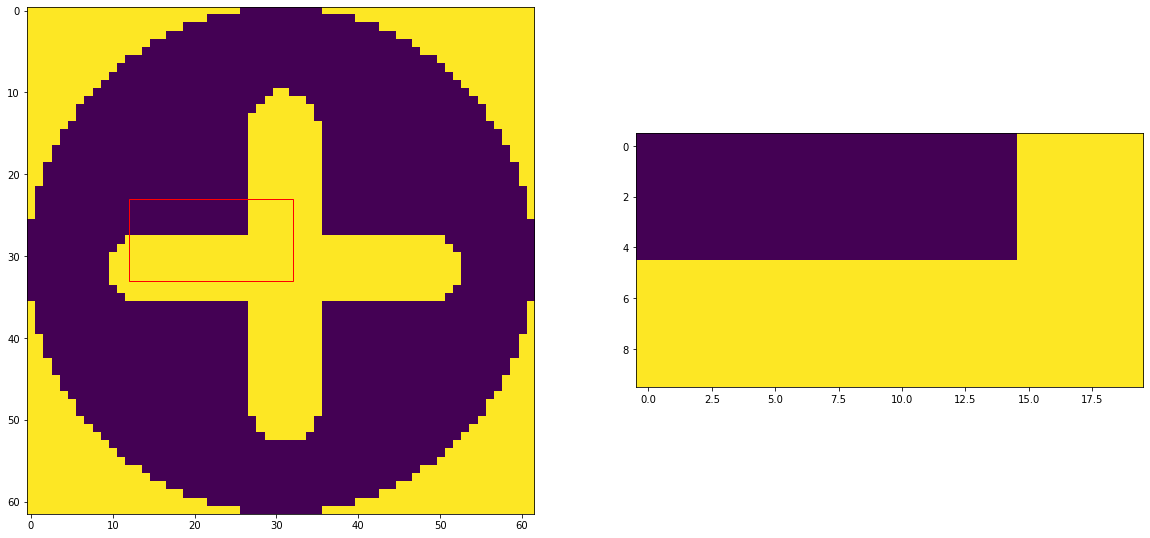

In [39]:
im_full_path = os.path.join(root_img_fold, "symbol_plus_mini.jpg")
block_corner = {"col_w":12,"row_h":23}
block_wh = {"w":20,"h":10}
img = mpimg.imread(im_full_path)
img = u.make_uint8_bw(img)
r = u.get_rectangle((block_corner["col_w"],block_corner["row_h"]), block_wh)
print(r)
img_box= u.crop_and_show(img,r)
print(img_box.shape)
r2, imgN, img_boxN,res_find = u.search_iminim(img, img_box)
print(r2)
print("imgN.shape= ", imgN.shape)
img_box_2 = u.crop_and_show(imgN,r2)

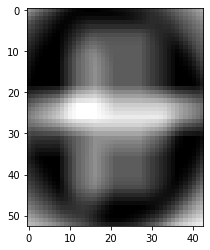

In [31]:
plt.imshow(res_find, cmap='gray')

<Figure size 432x288 with 0 Axes>

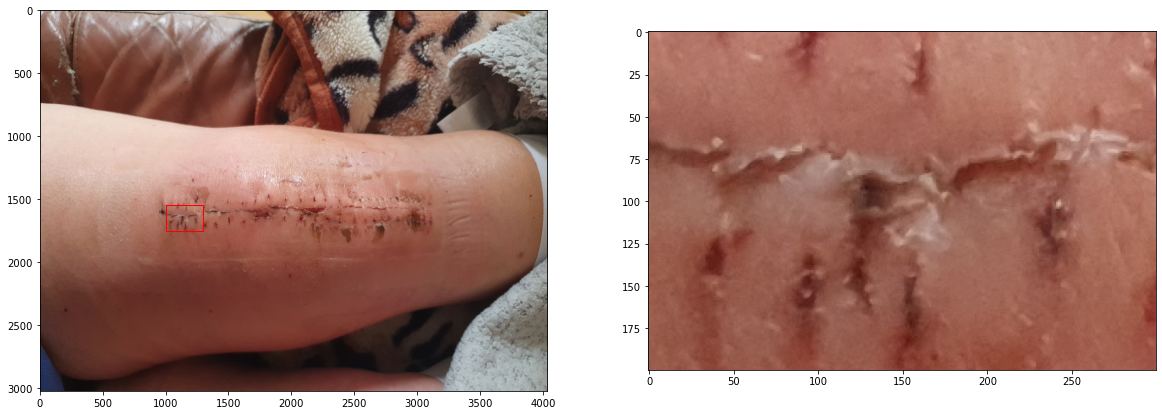

will convolve im((3024, 4032)) with cf((200, 300))
resizing 4032x3024 to 1024x768
resizing 300x200 to 76x50
perc(0.25396825396825395)
will find in res_find((719, 949))
expected max value is 3800
 faulty max can be 3362.0
 max val is 2978.000732421875
rect approximately at xcw(216.5625), yrh(2299.5)
Rectangle(xy=(1000, 1550), width=300, height=200, angle=0) 
 Rectangle(xy=(55, 584), width=76, height=50, angle=0)


<Figure size 432x288 with 0 Axes>

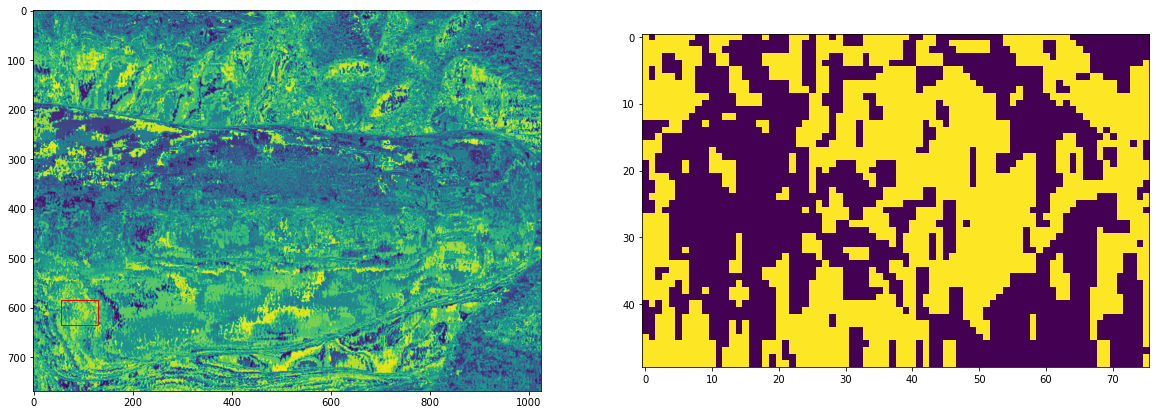

In [41]:
img = mpimg.imread(a_image_full_path)
block_corner = {"col_w":1000,"row_h":1550}
block_wh = {"w":300,"h":200}
r = u.get_rectangle((block_corner["col_w"],block_corner["row_h"]), block_wh)
_ = u.crop_and_show(img,r)
img_box = u.crop_rect_for_bw_search(img,r)
r2 , imgN, img_boxN, res_find = u.search_iminim(img, img_box)
print(r, "\n", r2)
img_box_2 = u.crop_and_show(imgN,r2)

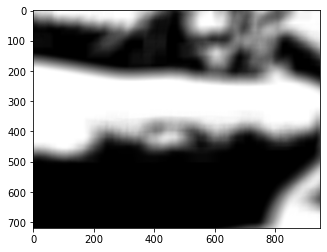

In [33]:
plt.imshow(res_find, cmap='gray')

In [ ]:
print(r)
print(r2)

In [ ]:
img = mpimg.imread(a_image_full_path)
img_box_2 = u.crop_and_show(img,r2)

In [ ]:
print(img.shape)
plt.imshow(img)

In [ ]:
from torchvision.transforms import Resize, ToPILImage, ToTensor, Compose
t = Compose([ToTensor(), ToPILImage(),Resize([302, 403])])
img2 = np.array(t(img))
plt.imshow(img2)

In [ ]:
print(img.shape[0])

In [ ]:
rh, cw = np.unravel_index(np.arange(24).reshape((3, 8)).argmax(),(3,8))
print(rh, cw)

<Figure size 432x288 with 0 Axes>

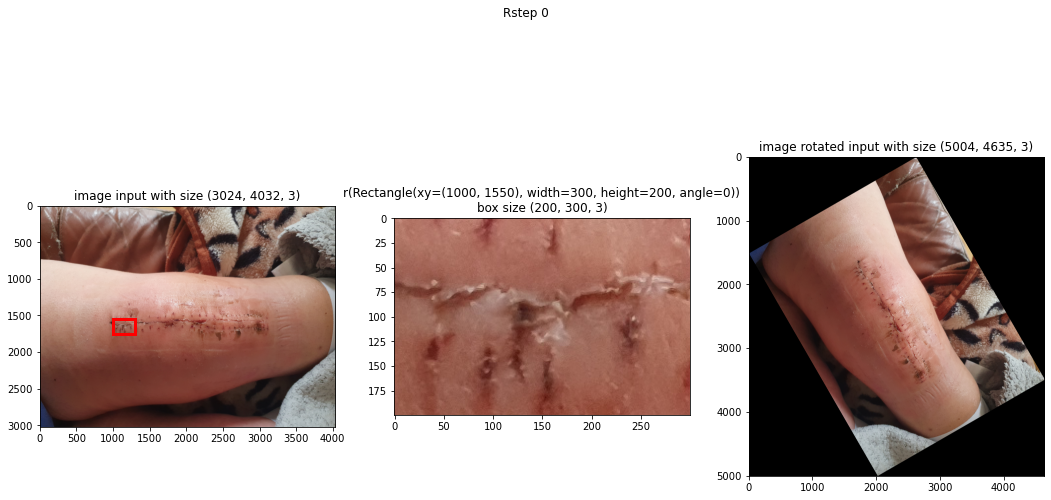

In [195]:
import utils as u
root_img_fold = "/home/doga/PycharmProjects/objectLocalization/dataset/wounds"
rgb = [150, 550, 950, 1350]
rgb_big = [600, 2200, 3800, 5400]
for imID in range(0,1):
    for plus_pick in range(5):
        if imID==0 and plus_pick==4:
            imPath = os.path.join(root_img_fold, "2021-09-01_photo1.jpg")
            block_corner = {"col_w":1000,"row_h":1550}
            block_wh = {"w":300,"h":200}
        elif imID==1 and plus_pick<4:
            imPath = os.path.join(root_img_fold, "symbol_long.jpg")
            block_corner = {"col_w":rgb[plus_pick],"row_h":120}
            block_wh = {"w":100,"h":80}
        elif imID==2 and plus_pick<4:
            imPath = os.path.join(root_img_fold, "symbol_long_big.jpg")
            block_corner = {"col_w":rgb_big[plus_pick],"row_h":550}
            block_wh = {"w":400,"h":220}
        else:
            continue
        rect_crop = u.get_rectangle((block_corner["col_w"],block_corner["row_h"]), block_wh)
        ret_dict = u.locate_rotated_crop(imPath, rect_crop, rotate_deg=5)
        u.display_rotated_search(ret_dict, step=0, title_str="Rstep 0", imgname=f"im{imID}{plus_pick}")